# ZADANIE

Wybierz zbiór danych i zdefiniuj problem klasyfikacyjny, określając zmienną docelową i cechy.
1. Przeprowadź przygotowanie danych, obejmujące usunięcie duplikatów, obsługę braków,
kodowanie zmiennych kategorycznych oraz detekcję wartości odstających.

2. Zastosuj odpowiednie techniki balansowania zbioru. Podziel dane na zbiór treningowy i testowy.
Jeśli to konieczne, dokonaj skalowania zmiennych numerycznych.

3. Zbuduj model regresji logistycznej, przeprowadź predykcję i ocenę jakości modelu.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

In [ ]:
# Ładowanie datasetu

try:
    df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
except Exception as e:
    print(f"Nie udało się pobrać pliku z URL, spróbuj pobrać ręcznie diabetes.csv i umieścić w katalogu. Błąd: {e}")
    # Przykładowe stworzenie DataFrame w przypadku braku dostępu
    data = {
        'Pregnancies': [6, 1, 8, 1, 0, 5, 3, 10, 2, 8],
        'Glucose': [148, 85, 183, 89, 137, 116, 78, 115, 197, 125],
        'BloodPressure': [72, 66, 64, 66, 40, 74, 50, 0, 70, 96],
        'SkinThickness': [35, 29, 0, 23, 35, 0, 32, 0, 45, 0],
        'Insulin': [0, 0, 0, 94, 168, 0, 88, 0, 543, 0],
        'BMI': [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0],
        'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158, 0.232],
        'Age': [50, 31, 32, 21, 33, 30, 26, 29, 53, 54],
        'Outcome': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
    }
    df = pd.DataFrame(data)


print("--- Dane początkowe ---")
print(df.head())
print("\nKształt danych:", df.shape)
print("\nInformacje o typach danych i brakach:")
print(df.info())


--- Dane początkowe ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Kształt danych: (768, 9)

Informacje o typach danych i brakach:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  


In [5]:
# Usuwanie duplikatów

df.drop_duplicates(inplace=True)
print("Kształt po usunięciu duplikatów:", df.shape)

Kształt po usunięciu duplikatów: (768, 9)


In [6]:
cols_with_zeros_as_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros_as_nan:
    df[col] = df[col].replace(0, np.nan)

print("\nLiczba braków po zastąpieniu 0 wartością NaN:")
print(df.isnull().sum())


Liczba braków po zastąpieniu 0 wartością NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:
for col in cols_with_zeros_as_nan:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
print("\nLiczba braków po uzupełnieniu medianą:")
print(df.isnull().sum())



Liczba braków po uzupełnieniu medianą:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\Jan\AppData\Local\Temp\ipykernel_24844\1025645175.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\Jan\AppData\Local\Temp\ipykernel_24844\1025645175.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d


--- Detekcja wartości odstających (przykładowo dla Glucose i BMI) ---


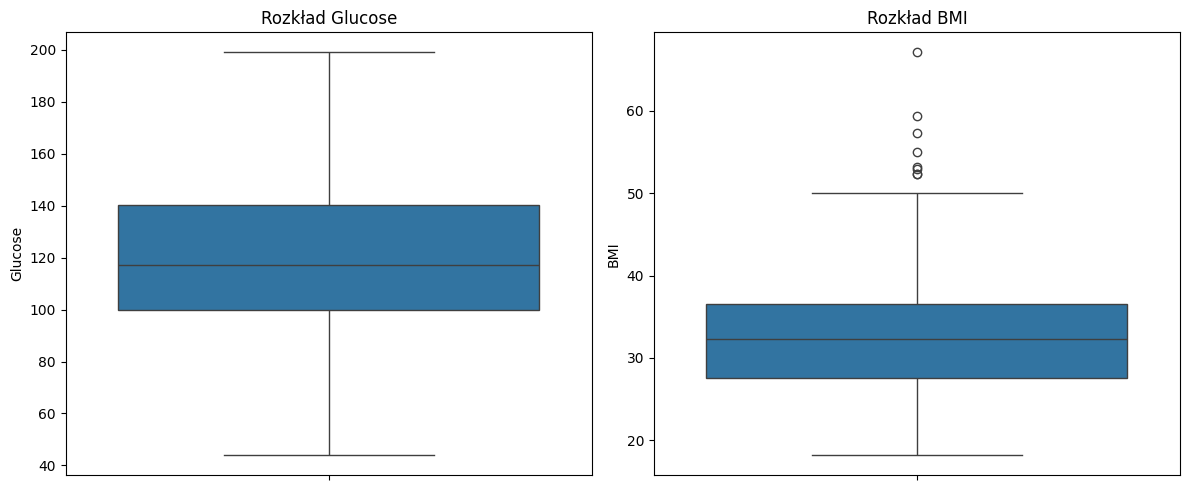

In [8]:
print("\n--- Detekcja wartości odstających (przykładowo dla Glucose i BMI) ---")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Glucose'])
plt.title('Rozkład Glucose')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['BMI'])
plt.title('Rozkład BMI')
plt.tight_layout()
plt.show()

In [9]:
# Funkcja do identyfikacji wartości odstających za pomocą IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [10]:
print("\nWartości odstające dla Glucose (IQR):")
print(find_outliers_iqr(df, 'Glucose').shape[0], "odstających")
print("\nWartości odstające dla BMI (IQR):")
print(find_outliers_iqr(df, 'BMI').shape[0], "odstających")


Wartości odstające dla Glucose (IQR):
0 odstających

Wartości odstające dla BMI (IQR):
8 odstających


In [15]:
# Balansowanie
print("Rozkład zmiennej 'Outcome' przed balansowaniem:")
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True))

Rozkład zmiennej 'Outcome' przed balansowaniem:
Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [14]:
def smote(df, column):
    if df[column].value_counts()[0] / df[column].value_counts()[1] > 2 or \
    df[column].value_counts()[1] / df[column].value_counts()[0] > 2:
        print("\nZbiór jest niezbalansowany, stosuję SMOTE...")
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        print(f"Rozkład zmiennej {column} po zastosowaniu SMOTE:")
        print(y_resampled.value_counts())
        X = X_resampled
        y = y_resampled
    else:
        print("\nZbiór jest wystarczająco zbalansowany, pomijam SMOTE.")

In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


smote(df,'Outcome')


Zbiór jest wystarczająco zbalansowany, pomijam SMOTE.


In [17]:
# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Kształt zbioru treningowego X: {X_train.shape}, y: {y_train.shape}")
print(f"Kształt zbioru testowego X: {X_test.shape}, y: {y_test.shape}")


Kształt zbioru treningowego X: (576, 8), y: (576,)
Kształt zbioru testowego X: (192, 8), y: (192,)


In [19]:
# Skalowanie zmiennych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nPrzykładowe dane po skalowaniu (pierwsze 5 wierszy zbioru treningowego):")
print(X_train_scaled_df.head())



Przykładowe dane po skalowaniu (pierwsze 5 wierszy zbioru treningowego):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.855471 -0.019266       0.486075       1.124727 -0.803010  0.954719   
1     2.467805 -1.115725       0.159569       1.238125 -1.057352  0.405410   
2    -0.855471 -0.451205      -0.983204       1.918513  0.519569  0.435102   
3    -1.157587 -0.550883       1.465594      -0.009253 -0.154438 -0.440824   
4    -0.855471 -0.152171      -0.983204      -0.689641 -0.396063  0.182717   

   DiabetesPedigreeFunction       Age  
0                 -0.658457 -0.466486  
1                 -0.306999  1.218656  
2                 -0.195854 -0.803514  
3                 -0.850708  1.050142  
4                 -0.042655 -0.550743  



Metryki oceny modelu:
Accuracy: 0.7292
Precision: 0.6364
Recall: 0.5224
F1-Score: 0.5738
ROC AUC Score: 0.8239

Macierz konfuzji:
[[105  20]
 [ 32  35]]


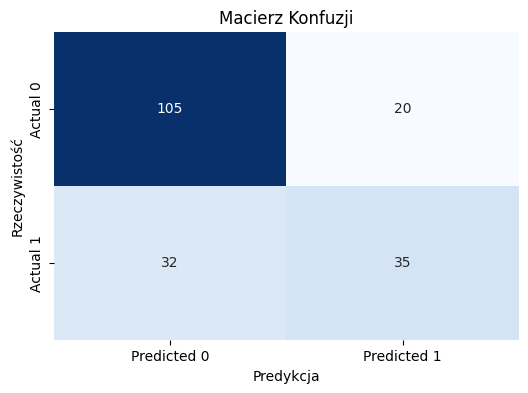

In [20]:
# Regresja i ocena

model = LogisticRegression(random_state=42, solver='liblinear') # liblinear dla małych zbiorów i L1/L2
model.fit(X_train_scaled, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Prawdopodobieństwo klasy pozytywnej

# Ocena jakości modelu
print("\nMetryki oceny modelu:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Macierz konfuzji
print("\nMacierz konfuzji:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Macierz Konfuzji')
plt.xlabel('Predykcja')
plt.ylabel('Rzeczywistość')
plt.show()